In [115]:
import aqi_formulation
import numpy as np
import os
import pandas as pd

# Meteorological Data

In [116]:
meteorological_data = []

for year in range(2010, 2021+1):
    meteorological_data_file = sorted(os.listdir(f".\\Meteorological Data\\{year}"))

    for i in range(len(meteorological_data_file)):
        temp_df = pd.read_excel(f".\\Meteorological Data\\{year}\\{meteorological_data_file[i]}", engine='openpyxl')
        temp_df['tanggal'] = pd.to_datetime(temp_df['tanggal'], dayfirst=True)
        meteorological_data.append(temp_df)

combined_meteorological_data = pd.concat(meteorological_data)
combined_meteorological_data = combined_meteorological_data.loc[(combined_meteorological_data['tanggal'].dt.year <= 2019), :]
combined_meteorological_data.reset_index(drop=True, inplace=True)
combined_meteorological_data

,tanggal,temperatur_minimum,temperatur_maksimum,temperatur_rata-rata,kelembapan_rata-rata,curah_hujan,lamanya_penyinaran_matahari,kecepatan_angin_maksimum,arah_angin_saat_kecepatan_maksimum,kecepatan_angin_rata-rata,arah_angin_terbanyak
0,2010-10-01,25.0,33.8,29.8,70.0,8888.0,7.8,3.0,180.0,2.0,S
1,2010-10-02,27.0,33.0,28.1,78.0,0.5,3.5,4.0,180.0,3.0,S
2,2010-10-03,24.0,30.2,25.8,90.0,47.8,0.0,4.0,90.0,3.0,E
3,2010-10-04,24.0,32.0,27.3,83.0,0.3,2.3,5.0,225.0,3.0,S
4,2010-10-05,26.0,30.4,27.4,84.0,0.5,0.0,3.0,225.0,2.0,SW
...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-09-26,27.0,35.0,29.9,70.0,0.0,7.3,6.0,310.0,1.0,C
3648,2019-09-27,27.0,33.6,29.9,68.0,0.0,8.5,4.0,330.0,2.0,C
3649,2019-09-28,27.0,32.4,29.4,71.0,0.0,6.5,4.0,120.0,1.0,C
3650,2019-09-29,27.0,32.4,29.1,72.0,0.0,5.0,4.0,60.0,1.0,C


In [117]:
combined_meteorological_data.replace([8888, 9999], np.nan, inplace=True)

In [118]:
combined_meteorological_data.columns

Index(['tanggal', 'temperatur_minimum', 'temperatur_maksimum',
       'temperatur_rata-rata', 'kelembapan_rata-rata', 'curah_hujan',
       'lamanya_penyinaran_matahari', 'kecepatan_angin_maksimum',
       'arah_angin_saat_kecepatan_maksimum', 'kecepatan_angin_rata-rata',
       'arah_angin_terbanyak'],
      dtype='object')

In [119]:
combined_meteorological_data.drop(columns=['temperatur_minimum', 'temperatur_maksimum', 'lamanya_penyinaran_matahari', 'kecepatan_angin_maksimum', 'arah_angin_saat_kecepatan_maksimum', 'arah_angin_terbanyak'], axis=1, inplace=True)

In [120]:
combined_meteorological_data = combined_meteorological_data.rename({'temperatur_rata-rata': 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata': 'kelembapan_rata-rata(%)', 'curah_hujan': 'curah_hujan(mm)', 'kecepatan_angin_rata-rata': 'kecepatan_angin_rata-rata(m/s)'}, axis=1)

In [121]:
combined_meteorological_data

,tanggal,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-10-01,29.8,70.0,NaN,2.0
1,2010-10-02,28.1,78.0,0.5,3.0
2,2010-10-03,25.8,90.0,47.8,3.0
3,2010-10-04,27.3,83.0,0.3,3.0
4,2010-10-05,27.4,84.0,0.5,2.0
...,...,...,...,...,...
3647,2019-09-26,29.9,70.0,0.0,1.0
3648,2019-09-27,29.9,68.0,0.0,2.0
3649,2019-09-28,29.4,71.0,0.0,1.0
3650,2019-09-29,29.1,72.0,0.0,1.0


In [122]:
combined_meteorological_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tanggal                         3652 non-null   datetime64[ns]
 1   temperatur_rata-rata(°C)        3642 non-null   float64       
 2   kelembapan_rata-rata(%)         3642 non-null   float64       
 3   curah_hujan(mm)                 3436 non-null   float64       
 4   kecepatan_angin_rata-rata(m/s)  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.8 KB


# AQI Data

In [123]:
aqi_daily = pd.read_csv(".\\Air Quality Data\\combined_aqi_data.csv", parse_dates=['tanggal'])
aqi_daily

,tanggal,stasiun,pm25(ug/m3),pm25,pm10(ug/m3),pm10,so2(ug/m3),so2,co(ug/m3),co,o3(ug/m3),o3,no2(ug/m3),no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),---,---,70,60,4,4,5840,73,65,27,22,14,73,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),---,---,32,32,2,2,1280,16,79,33,14,9,33,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),---,---,27,27,2,2,1520,19,48,20,14,9,27,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),---,---,22,22,2,2,1280,16,36,15,10,6,22,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),---,---,25,25,2,2,1360,17,36,15,13,8,25,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,2021-12-27,DKI5 (Kebon Jeruk),---,---,58,54,37,36,1120,14,50,21,75,47,54,PM10,SEDANG
21911,2021-12-28,DKI5 (Kebon Jeruk),---,---,44,44,21,20,880,11,50,21,53,33,44,PM10,BAIK
21912,2021-12-29,DKI5 (Kebon Jeruk),---,---,34,34,29,28,640,8,60,25,46,29,34,PM10,BAIK
21913,2021-12-30,DKI5 (Kebon Jeruk),---,---,56,53,26,25,1200,15,55,23,70,44,53,PM10,SEDANG


In [124]:
aqi_daily.replace('---', np.nan, inplace=True)

In [125]:
aqi_daily.columns

Index(['tanggal', 'stasiun', 'pm25(ug/m3)', 'pm25', 'pm10(ug/m3)', 'pm10',
       'so2(ug/m3)', 'so2', 'co(ug/m3)', 'co', 'o3(ug/m3)', 'o3', 'no2(ug/m3)',
       'no2', 'max', 'critical', 'categori'],
      dtype='object')

In [126]:
aqi_daily.drop(columns=['max', 'critical', 'categori'], axis=1, inplace=True)

In [127]:
aqi_daily = aqi_daily.rename({'pm25': 'pm25_ispu', 'pm10': 'pm10_ispu', 'so2': 'so2_ispu', 'co': 'co_ispu', 'o3': 'o3_ispu', 'no2': 'no2_ispu'}, axis=1)

In [128]:
aqi_daily['stasiun'].unique()

array(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)',
       'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk)'], dtype=object)

In [129]:
aqi_daily = aqi_daily[aqi_daily['stasiun'] == 'DKI1 (Bunderan HI)']
aqi_daily

,tanggal,stasiun,pm25(ug/m3),pm25_ispu,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu
0,2010-01-01,DKI1 (Bunderan HI),NaN,NaN,70,60,4,4,5840,73,65,27,22,14
1,2010-01-02,DKI1 (Bunderan HI),NaN,NaN,32,32,2,2,1280,16,79,33,14,9
2,2010-01-03,DKI1 (Bunderan HI),NaN,NaN,27,27,2,2,1520,19,48,20,14,9
3,2010-01-04,DKI1 (Bunderan HI),NaN,NaN,22,22,2,2,1280,16,36,15,10,6
4,2010-01-05,DKI1 (Bunderan HI),NaN,NaN,25,25,2,2,1360,17,36,15,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,DKI1 (Bunderan HI),23,59,54,52,80,61,1200,15,48,20,24,15
4379,2021-12-28,DKI1 (Bunderan HI),28,66,52,51,60,53,1200,15,43,18,21,13
4380,2021-12-29,DKI1 (Bunderan HI),16,51,31,31,62,54,800,10,58,24,18,11
4381,2021-12-30,DKI1 (Bunderan HI),31,69,60,55,60,53,1280,16,55,23,22,14


In [130]:
aqi_daily[['pm25(ug/m3)', 'pm25_ispu', 'pm10(ug/m3)', 'pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co(ug/m3)', 'co_ispu', 'o3(ug/m3)', 'o3_ispu', 'no2(ug/m3)', 'no2_ispu']] = aqi_daily[['pm25(ug/m3)', 'pm25_ispu', 'pm10(ug/m3)', 'pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co(ug/m3)', 'co_ispu', 'o3(ug/m3)', 'o3_ispu', 'no2(ug/m3)', 'no2_ispu']].astype(float)

In [131]:
aqi_daily

,tanggal,stasiun,pm25(ug/m3),pm25_ispu,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu
0,2010-01-01,DKI1 (Bunderan HI),NaN,NaN,70.0,60.0,4.0,4.0,5840.0,73.0,65.0,27.0,22.0,14.0
1,2010-01-02,DKI1 (Bunderan HI),NaN,NaN,32.0,32.0,2.0,2.0,1280.0,16.0,79.0,33.0,14.0,9.0
2,2010-01-03,DKI1 (Bunderan HI),NaN,NaN,27.0,27.0,2.0,2.0,1520.0,19.0,48.0,20.0,14.0,9.0
3,2010-01-04,DKI1 (Bunderan HI),NaN,NaN,22.0,22.0,2.0,2.0,1280.0,16.0,36.0,15.0,10.0,6.0
4,2010-01-05,DKI1 (Bunderan HI),NaN,NaN,25.0,25.0,2.0,2.0,1360.0,17.0,36.0,15.0,13.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,DKI1 (Bunderan HI),23.0,59.0,54.0,52.0,80.0,61.0,1200.0,15.0,48.0,20.0,24.0,15.0
4379,2021-12-28,DKI1 (Bunderan HI),28.0,66.0,52.0,51.0,60.0,53.0,1200.0,15.0,43.0,18.0,21.0,13.0
4380,2021-12-29,DKI1 (Bunderan HI),16.0,51.0,31.0,31.0,62.0,54.0,800.0,10.0,58.0,24.0,18.0,11.0
4381,2021-12-30,DKI1 (Bunderan HI),31.0,69.0,60.0,55.0,60.0,53.0,1280.0,16.0,55.0,23.0,22.0,14.0


In [132]:
aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 0 to 4382
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      4383 non-null   datetime64[ns]
 1   stasiun      4383 non-null   object        
 2   pm25(ug/m3)  2181 non-null   float64       
 3   pm25_ispu    2181 non-null   float64       
 4   pm10(ug/m3)  4115 non-null   float64       
 5   pm10_ispu    4115 non-null   float64       
 6   so2(ug/m3)   4151 non-null   float64       
 7   so2_ispu     4151 non-null   float64       
 8   co(ug/m3)    4176 non-null   float64       
 9   co_ispu      4176 non-null   float64       
 10  o3(ug/m3)    4123 non-null   float64       
 11  o3_ispu      4123 non-null   float64       
 12  no2(ug/m3)   4133 non-null   float64       
 13  no2_ispu     4133 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 513.6+ KB


# Combined AQI-Meteorological Data

In [133]:
combined_data = aqi_daily.merge(combined_meteorological_data)
combined_data.drop(['stasiun', 'pm25(ug/m3)', 'pm25_ispu', 'pm10_ispu', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu'], axis=1, inplace=True)
combined_data.set_index('tanggal', inplace=True)
pm10_ispu = [aqi_formulation.concentration_to_aqi('pm10', result) for result in combined_data['pm10(ug/m3)']]
combined_data.insert(1, 'pm10_ispu', pm10_ispu)
so2_ispu = [aqi_formulation.concentration_to_aqi('so2', result) for result in combined_data['so2(ug/m3)']]
combined_data.insert(3, 'so2_ispu', so2_ispu)
co_ispu = [aqi_formulation.concentration_to_aqi('co', result) for result in combined_data['co(ug/m3)']]
combined_data.insert(5, 'co_ispu', co_ispu)
o3_ispu = [aqi_formulation.concentration_to_aqi('o3', result) for result in combined_data['o3(ug/m3)']]
combined_data.insert(7, 'o3_ispu', o3_ispu)
no2_ispu = [aqi_formulation.concentration_to_aqi('no2', result) for result in combined_data['no2(ug/m3)']]
combined_data.insert(9, 'no2_ispu', no2_ispu)
combined_data

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-01,70.0,60.0,4.0,5.0,5840.0,73.0,65.0,28.0,22.0,14.0,28.7,75.0,0.0,4.0
2010-01-02,32.0,32.0,2.0,3.0,1280.0,17.0,79.0,33.0,14.0,10.0,28.7,73.0,6.6,2.0
2010-01-03,27.0,27.0,2.0,3.0,1520.0,20.0,48.0,21.0,14.0,10.0,28.8,72.0,0.0,3.0
2010-01-04,22.0,23.0,2.0,3.0,1280.0,17.0,36.0,16.0,10.0,7.0,29.9,70.0,0.0,2.0
2010-01-05,25.0,26.0,2.0,3.0,1360.0,18.0,36.0,16.0,13.0,9.0,28.5,70.0,0.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,54.0,52.0,29.0,28.0,1680.0,22.0,98.0,41.0,18.0,12.0,27.3,85.0,3.0,1.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,86.0,36.5,2.0
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,84.0,10.2,1.0


In [134]:
combined_data['so2(ug/m3)'] = combined_data.loc[(combined_data.index.year < 2013) | (combined_data.index.year > 2015), 'so2(ug/m3)']
combined_data

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-01,70.0,60.0,4.0,5.0,5840.0,73.0,65.0,28.0,22.0,14.0,28.7,75.0,0.0,4.0
2010-01-02,32.0,32.0,2.0,3.0,1280.0,17.0,79.0,33.0,14.0,10.0,28.7,73.0,6.6,2.0
2010-01-03,27.0,27.0,2.0,3.0,1520.0,20.0,48.0,21.0,14.0,10.0,28.8,72.0,0.0,3.0
2010-01-04,22.0,23.0,2.0,3.0,1280.0,17.0,36.0,16.0,10.0,7.0,29.9,70.0,0.0,2.0
2010-01-05,25.0,26.0,2.0,3.0,1360.0,18.0,36.0,16.0,13.0,9.0,28.5,70.0,0.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,54.0,52.0,29.0,28.0,1680.0,22.0,98.0,41.0,18.0,12.0,27.3,85.0,3.0,1.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,86.0,36.5,2.0
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,84.0,10.2,1.0


In [135]:
combined_data.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,3439.000000,3439.000000,2452.000000,3480.000000,3503.000000,3503.000000,3446.000000,3446.000000,3456.000000,3456.000000,3642.000000,3642.000000,3436.000000,3650.000000
mean,60.409131,52.945624,20.050163,17.644253,2201.061947,27.970882,124.811376,52.997678,20.631944,13.731192,28.482510,75.804503,5.976251,1.895890
std,22.529351,14.708362,8.860836,9.207199,801.423215,9.653403,56.800308,25.164769,12.110392,7.404877,1.037746,6.190441,15.803359,0.881968
min,4.000000,5.000000,1.000000,2.000000,320.000000,5.000000,7.000000,4.000000,2.000000,2.000000,24.100000,52.000000,0.000000,0.000000
25%,44.000000,44.000000,14.000000,10.000000,1600.000000,21.000000,79.000000,33.000000,8.000000,6.000000,27.900000,72.000000,0.000000,1.000000
50%,60.000000,55.000000,20.000000,17.000000,2160.000000,27.000000,120.000000,50.000000,21.000000,14.000000,28.600000,76.000000,0.000000,2.000000
75%,76.000000,63.000000,26.000000,24.000000,2640.000000,33.000000,164.000000,69.000000,30.000000,19.000000,29.200000,80.000000,4.000000,3.000000
max,158.000000,104.000000,67.000000,56.000000,7600.000000,95.000000,396.000000,198.000000,62.000000,39.000000,34.300000,96.000000,277.500000,5.000000


In [136]:
# combined_data[['pm10(ug/m3)']].isna().sum()
combined_data.isna().sum()

pm10(ug/m3)                        213
pm10_ispu                          213
so2(ug/m3)                        1200
so2_ispu                           172
co(ug/m3)                          149
co_ispu                            149
o3(ug/m3)                          206
o3_ispu                            206
no2(ug/m3)                         196
no2_ispu                           196
temperatur_rata-rata(°C)            10
kelembapan_rata-rata(%)             10
curah_hujan(mm)                    216
kecepatan_angin_rata-rata(m/s)       2
dtype: int64

In [137]:
combined_data[combined_data.isna().any(axis=1)]

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-22,52.0,51.0,4.0,5.0,3600.0,45.0,34.0,15.0,21.0,14.0,26.1,84.0,NaN,2.0
2010-03-08,62.0,56.0,7.0,8.0,2960.0,37.0,94.0,39.0,29.0,19.0,28.6,78.0,NaN,3.0
2010-03-15,54.0,52.0,8.0,9.0,2240.0,28.0,72.0,30.0,24.0,16.0,29.4,74.0,NaN,2.0
2010-03-21,54.0,52.0,7.0,8.0,2640.0,33.0,74.0,31.0,26.0,17.0,29.1,76.0,NaN,3.0
2010-03-24,NaN,NaN,7.0,8.0,3280.0,41.0,233.0,99.0,46.0,29.0,30.1,76.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-12,NaN,NaN,23.0,23.0,NaN,NaN,110.0,46.0,22.0,14.0,27.2,83.0,NaN,1.0
2019-12-21,64.0,57.0,23.0,23.0,2240.0,28.0,118.0,49.0,22.0,14.0,29.3,72.0,NaN,2.0
2019-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,86.0,24.5,1.0


In [138]:
combined_data = combined_data[~combined_data.isna().any(axis=1)]

In [139]:
combined_data.corr()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.981137,0.175799,0.173724,0.374409,0.371268,0.340335,0.334827,0.343408,0.343813,0.212809,-0.170890,-0.138854,-0.022812
pm10_ispu,0.981137,1.000000,0.143558,0.141325,0.364409,0.360844,0.336206,0.328926,0.333316,0.333921,0.216744,-0.153928,-0.129496,-0.044823
so2(ug/m3),0.175799,0.143558,1.000000,0.999221,0.165183,0.159993,0.075103,0.083466,-0.036425,-0.037122,0.045087,-0.001388,-0.014489,-0.028425
so2_ispu,0.173724,0.141325,0.999221,1.000000,0.165696,0.160565,0.078451,0.086358,-0.031158,-0.031892,0.042550,-0.001459,-0.014418,-0.025260
co(ug/m3),0.374409,0.364409,0.165183,0.165696,1.000000,0.999370,0.162716,0.158531,0.521866,0.521425,-0.133829,0.288987,0.100267,0.283587
co_ispu,0.371268,0.360844,0.159993,0.160565,0.999370,1.000000,0.161821,0.157589,0.519678,0.519258,-0.134946,0.288270,0.099460,0.281045
o3(ug/m3),0.340335,0.336206,0.075103,0.078451,0.162716,0.161821,1.000000,0.995240,0.486351,0.486430,0.160465,-0.211146,-0.073967,0.128199
o3_ispu,0.334827,0.328926,0.083466,0.086358,0.158531,0.157589,0.995240,1.000000,0.470740,0.470804,0.155907,-0.206520,-0.073212,0.122676
no2(ug/m3),0.343408,0.333316,-0.036425,-0.031158,0.521866,0.519678,0.486351,0.470740,1.000000,0.999389,0.053793,-0.119338,-0.053635,0.459884
no2_ispu,0.343813,0.333921,-0.037122,-0.031892,0.521425,0.519258,0.486430,0.470804,0.999389,1.000000,0.054501,-0.118737,-0.052449,0.458678


In [140]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2156 entries, 2010-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pm10(ug/m3)                     2156 non-null   float64
 1   pm10_ispu                       2156 non-null   float64
 2   so2(ug/m3)                      2156 non-null   float64
 3   so2_ispu                        2156 non-null   float64
 4   co(ug/m3)                       2156 non-null   float64
 5   co_ispu                         2156 non-null   float64
 6   o3(ug/m3)                       2156 non-null   float64
 7   o3_ispu                         2156 non-null   float64
 8   no2(ug/m3)                      2156 non-null   float64
 9   no2_ispu                        2156 non-null   float64
 10  temperatur_rata-rata(°C)        2156 non-null   float64
 11  kelembapan_rata-rata(%)         2156 non-null   float64
 12  curah_hujan(mm) 

In [141]:
combined_data.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,57.308442,51.027829,19.981911,19.809369,2151.688312,27.386364,123.841837,52.791280,17.684601,11.926252,28.516327,75.663265,5.550232,1.988404
std,21.409540,14.519374,8.796653,8.226341,759.343181,9.116191,61.778840,27.483453,12.109162,7.406252,0.954522,5.931924,14.052635,0.897201
min,5.000000,6.000000,1.000000,2.000000,320.000000,5.000000,7.000000,4.000000,2.000000,2.000000,24.900000,54.000000,0.000000,0.000000
25%,42.000000,42.000000,14.000000,14.000000,1600.000000,21.000000,70.000000,30.000000,6.000000,5.000000,27.900000,72.000000,0.000000,1.000000
50%,56.000000,53.000000,19.000000,19.000000,2080.000000,26.000000,118.000000,49.000000,18.000000,12.000000,28.600000,76.000000,0.000000,2.000000
75%,72.000000,61.000000,27.000000,26.000000,2560.000000,32.000000,171.000000,72.000000,27.000000,18.000000,29.200000,80.000000,3.800000,3.000000
max,158.000000,104.000000,62.000000,54.000000,7600.000000,95.000000,396.000000,198.000000,61.000000,38.000000,30.800000,94.000000,179.700000,5.000000


### PM<sub>10</sub>

<Axes: xlabel='tanggal'>

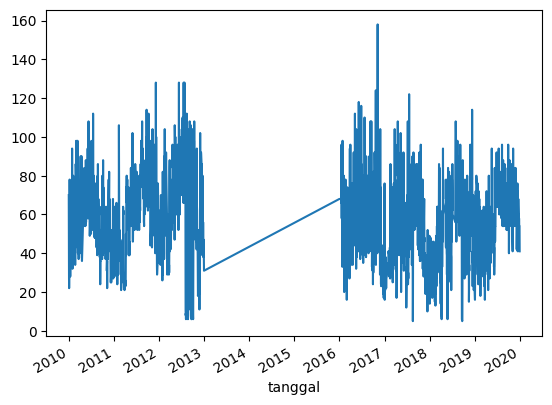

In [142]:
combined_data['pm10(ug/m3)'].plot()

<Axes: >

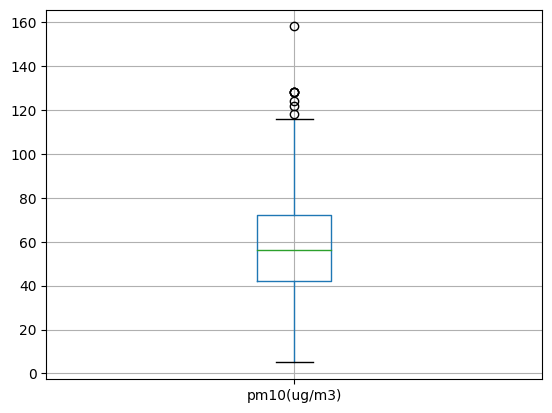

In [143]:
combined_data[['pm10(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'pm10(ug/m3)'}>]], dtype=object)

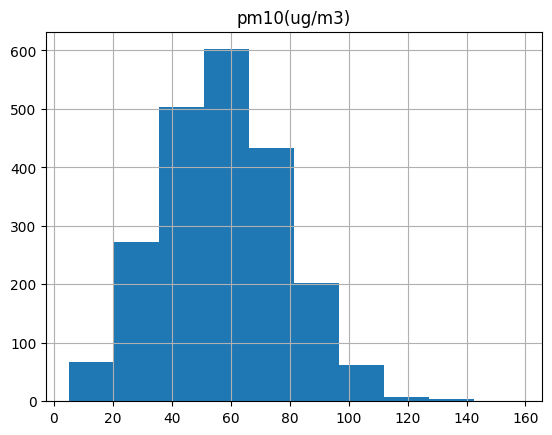

In [144]:
combined_data[['pm10(ug/m3)']].hist()

In [145]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [146]:
outliers = find_outliers_IQR(combined_data['pm10(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 8
max outlier value: 158.0
min outlier value: 118.0


In [147]:
combined_data[['pm10(ug/m3)']].nlargest(int(len(combined_data) / 100 * 5), 'pm10(ug/m3)', keep='all')

,pm10(ug/m3)
tanggal,
2016-11-06,158.0
2011-12-07,128.0
2012-06-11,128.0
2012-07-19,128.0
2012-07-26,128.0
...,...
2018-04-19,94.0
2018-08-09,94.0
2019-05-19,94.0


In [148]:
combined_data[['pm10(ug/m3)']].nsmallest(int(len(combined_data) / 100 * 5), 'pm10(ug/m3)', keep='all')

,pm10(ug/m3)
tanggal,
2017-08-18,5.0
2018-09-22,5.0
2012-08-07,6.0
2012-08-23,6.0
2012-09-19,6.0
...,...
2018-02-06,24.0
2018-02-11,24.0
2018-02-20,24.0


### SO<sub>2</sub>

<Axes: xlabel='tanggal'>

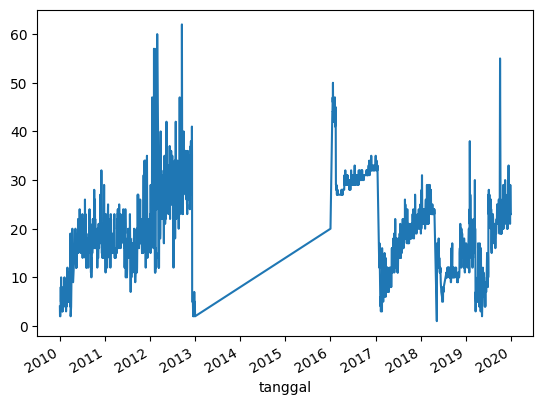

In [149]:
combined_data['so2(ug/m3)'].plot()

array([[<Axes: title={'center': 'so2(ug/m3)'}>]], dtype=object)

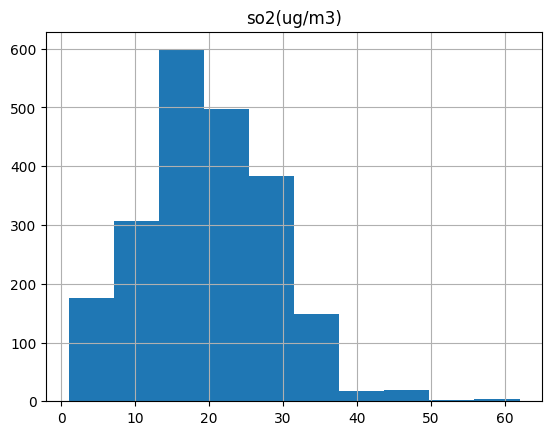

In [150]:
combined_data[['so2(ug/m3)']].hist()

<Axes: >

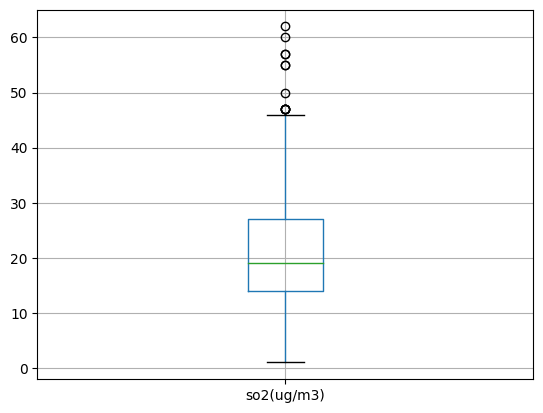

In [151]:
combined_data[['so2(ug/m3)']].boxplot()

In [152]:
outliers = find_outliers_IQR(combined_data['so2(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 12
max outlier value: 62.0
min outlier value: 47.0


In [153]:
combined_data[['so2(ug/m3)']].nlargest(int(len(combined_data) / 100 * 5), 'so2(ug/m3)', keep='all')

,so2(ug/m3)
tanggal,
2012-09-15,62.0
2012-02-28,60.0
2012-02-02,57.0
2012-02-20,57.0
2012-02-29,55.0
...,...
2017-01-11,33.0
2017-01-12,33.0
2017-01-13,33.0


In [154]:
combined_data[['so2(ug/m3)']].nsmallest(int(len(combined_data) / 100 * 5), 'so2(ug/m3)', keep='all')

,so2(ug/m3)
tanggal,
2018-05-11,1.0
2010-01-02,2.0
2010-01-03,2.0
2010-01-04,2.0
2010-01-05,2.0
...,...
2019-05-14,6.0
2019-05-30,6.0
2019-05-31,6.0


### CO

<Axes: xlabel='tanggal'>

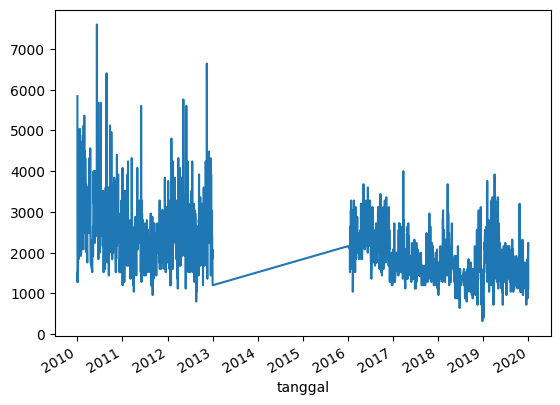

In [155]:
combined_data['co(ug/m3)'].plot()

<Axes: >

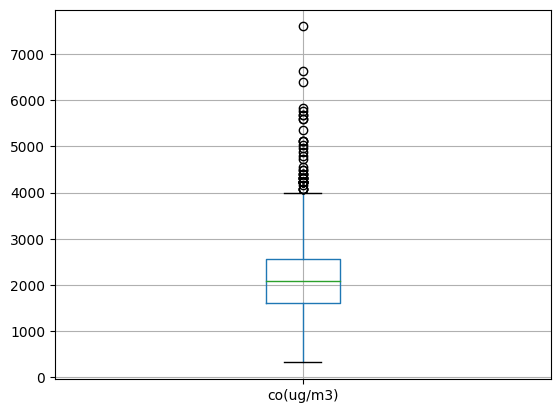

In [156]:
combined_data[['co(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'co(ug/m3)'}>]], dtype=object)

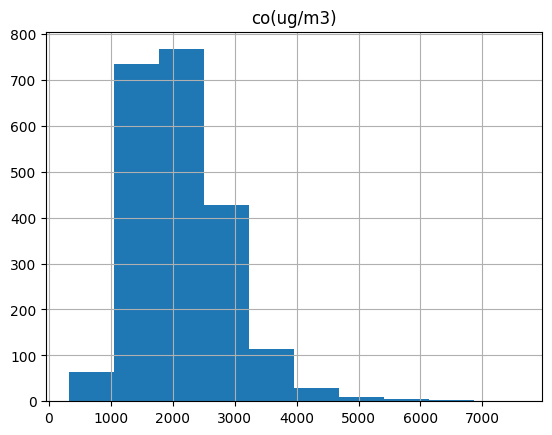

In [157]:
combined_data[['co(ug/m3)']].hist()

In [158]:
outliers = find_outliers_IQR(combined_data['co(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 42
max outlier value: 7600.0
min outlier value: 4080.0


In [159]:
combined_data[['co(ug/m3)']].nlargest(int(len(combined_data) / 100 * 5), 'co(ug/m3)', keep='all')

,co(ug/m3)
tanggal,
2010-06-08,7600.0
2012-11-14,6640.0
2010-08-25,6400.0
2010-01-01,5840.0
2012-05-08,5760.0
...,...
2012-05-02,3520.0
2012-06-02,3520.0
2012-07-13,3520.0


In [160]:
combined_data[['co(ug/m3)']].nsmallest(int(len(combined_data) / 100 * 5), 'co(ug/m3)', keep='all')

,co(ug/m3)
tanggal,
2018-12-24,320.0
2019-01-03,400.0
2018-12-25,480.0
2018-12-26,560.0
2018-06-23,640.0
...,...
2019-11-05,1200.0
2019-11-15,1200.0
2019-11-30,1200.0


### O<sub>3</sub>

<Axes: xlabel='tanggal'>

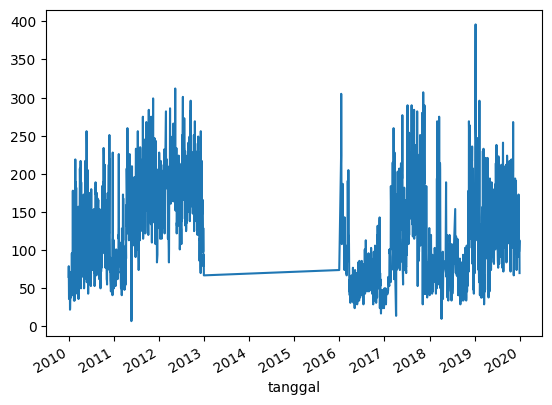

In [161]:
combined_data['o3(ug/m3)'].plot()

<Axes: >

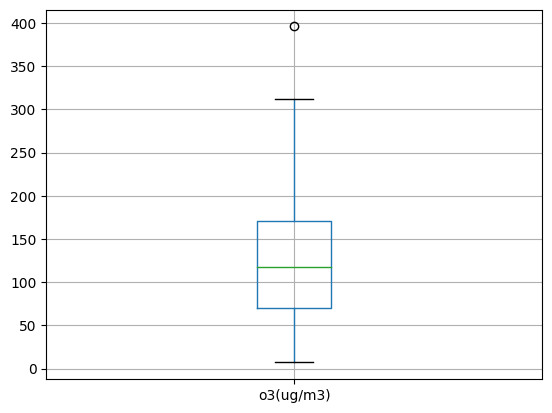

In [162]:
combined_data[['o3(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'o3(ug/m3)'}>]], dtype=object)

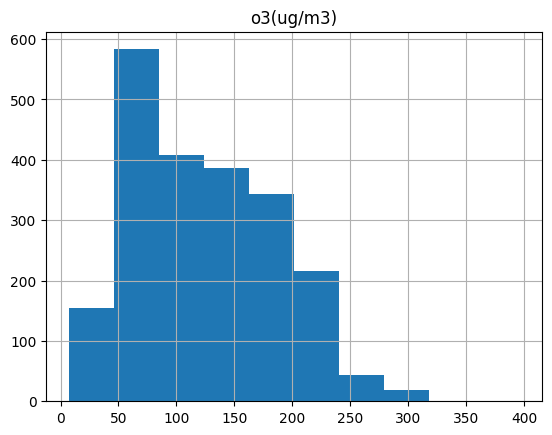

In [163]:
combined_data[['o3(ug/m3)']].hist()

In [164]:
outliers = find_outliers_IQR(combined_data['o3(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 1
max outlier value: 396.0
min outlier value: 396.0


In [165]:
combined_data[['o3(ug/m3)']].nlargest(int(len(combined_data) / 100 * 5), 'o3(ug/m3)', keep='all')

,o3(ug/m3)
tanggal,
2019-01-09,396.0
2012-05-13,312.0
2017-11-11,307.0
2016-01-17,305.0
2012-07-14,301.0
...,...
2012-10-03,228.0
2012-11-29,228.0
2017-03-24,228.0


In [166]:
combined_data[['o3(ug/m3)']].nsmallest(int(len(combined_data) / 100 * 5), 'o3(ug/m3)', keep='all')

,o3(ug/m3)
tanggal,
2011-05-24,7.0
2011-05-25,10.0
2018-04-08,10.0
2011-05-26,12.0
2018-04-10,12.0
...,...
2018-08-22,41.0
2018-08-24,41.0
2018-09-18,41.0


### NO<sub>2</sub>

<Axes: xlabel='tanggal'>

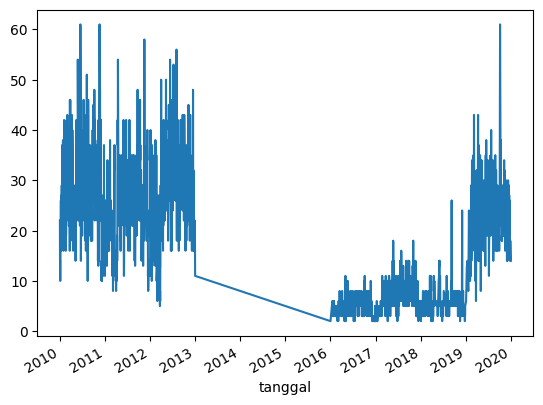

In [167]:
combined_data['no2(ug/m3)'].plot()

<Axes: >

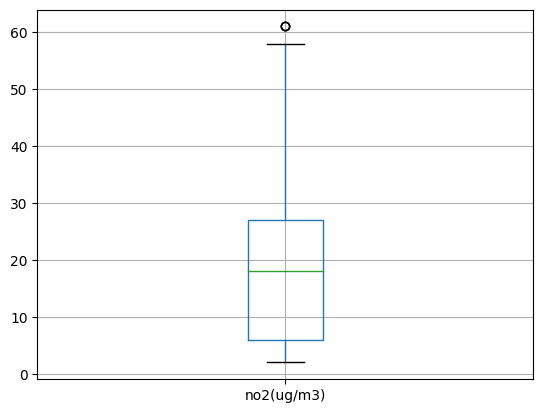

In [168]:
combined_data[['no2(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'no2(ug/m3)'}>]], dtype=object)

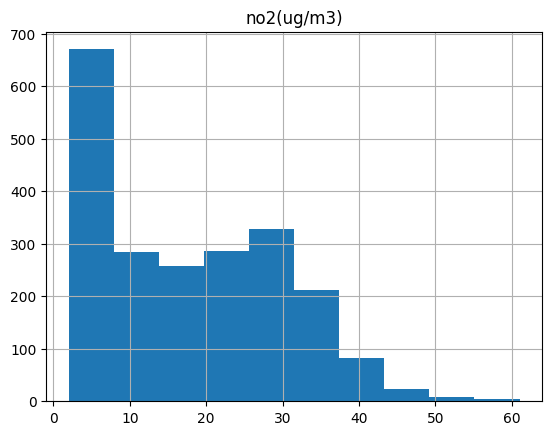

In [169]:
combined_data[['no2(ug/m3)']].hist()

In [170]:
outliers = find_outliers_IQR(combined_data['no2(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 3
max outlier value: 61.0
min outlier value: 61.0


In [171]:
combined_data[['no2(ug/m3)']].nlargest(int(len(combined_data) / 100 * 5), 'no2(ug/m3)', keep='all')

,no2(ug/m3)
tanggal,
2010-06-16,61.0
2010-11-18,61.0
2019-10-05,61.0
2011-11-16,58.0
2012-08-02,56.0
...,...
2012-06-09,38.0
2012-08-08,38.0
2012-08-14,38.0


In [172]:
combined_data[['no2(ug/m3)']].nsmallest(int(len(combined_data) / 100 * 5), 'no2(ug/m3)', keep='all')

,no2(ug/m3)
tanggal,
2016-01-01,2.0
2016-02-27,2.0
2016-03-04,2.0
2016-04-23,2.0
2016-04-24,2.0
...,...
2018-11-29,3.0
2018-12-15,3.0
2018-12-16,3.0


### Clean-v1

In [173]:
combined_data.skew(axis=0)

pm10(ug/m3)                       0.206819
pm10_ispu                        -0.543894
so2(ug/m3)                        0.399956
so2_ispu                          0.343245
co(ug/m3)                         1.234783
co_ispu                           1.350067
o3(ug/m3)                         0.435840
o3_ispu                           0.744573
no2(ug/m3)                        0.508969
no2_ispu                          0.503272
temperatur_rata-rata(°C)         -0.531787
kelembapan_rata-rata(%)          -0.049734
curah_hujan(mm)                   4.474545
kecepatan_angin_rata-rata(m/s)    0.204090
dtype: float64

### PM<sub>10</sub> Clean-v1

In [174]:
combined_data['pm10(ug/m3)'] = combined_data['pm10(ug/m3)'][(combined_data['pm10(ug/m3)'] < 126)]

C:\Users\ernic\AppData\Local\Temp\ipykernel_14248\3114857791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['pm10(ug/m3)'] = combined_data['pm10(ug/m3)'][(combined_data['pm10(ug/m3)'] < 126)]


<Axes: xlabel='tanggal'>

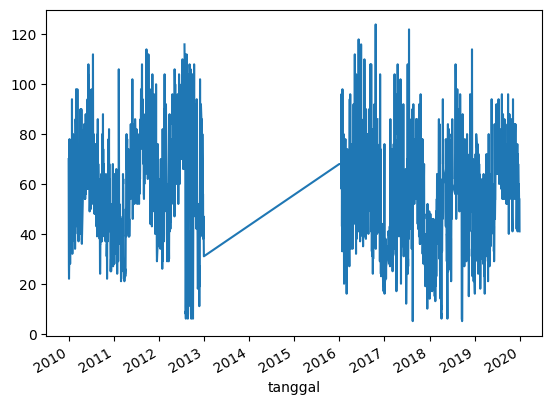

In [175]:
combined_data['pm10(ug/m3)'].plot()

<Axes: >

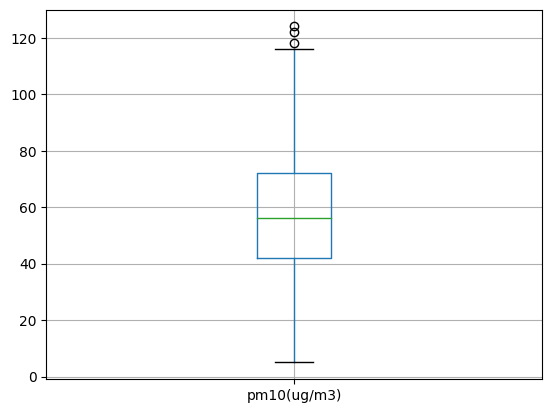

In [176]:
combined_data[['pm10(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'pm10(ug/m3)'}>]], dtype=object)

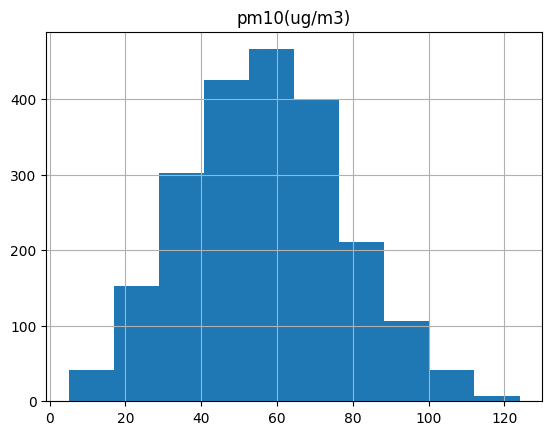

In [177]:
combined_data[['pm10(ug/m3)']].hist()

In [178]:
outliers = find_outliers_IQR(combined_data['pm10(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 3
max outlier value: 124.0
min outlier value: 118.0


### SO<sub>2</sub> Clean-v1

In [179]:
combined_data['so2(ug/m3)'] = combined_data['so2(ug/m3)'][combined_data['so2(ug/m3)'] < 46]

C:\Users\ernic\AppData\Local\Temp\ipykernel_14248\2051282573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['so2(ug/m3)'] = combined_data['so2(ug/m3)'][combined_data['so2(ug/m3)'] < 46]


<Axes: xlabel='tanggal'>

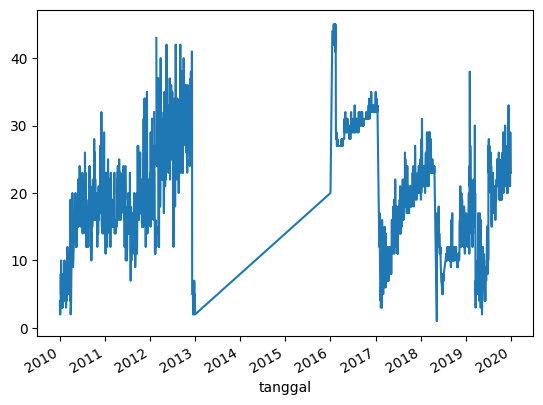

In [180]:
combined_data['so2(ug/m3)'].plot()

<Axes: >

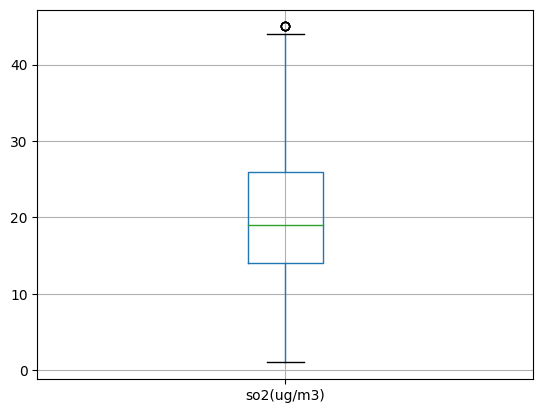

In [181]:
combined_data[['so2(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'so2(ug/m3)'}>]], dtype=object)

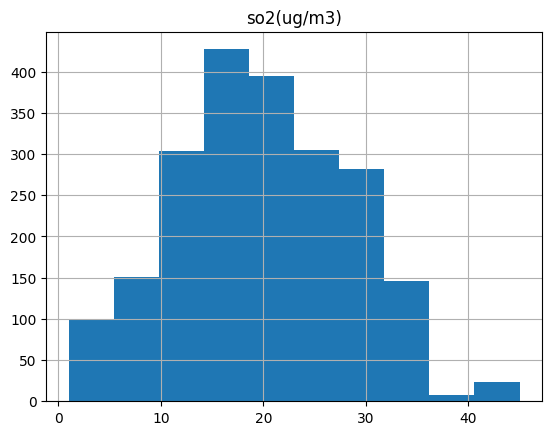

In [182]:
combined_data[['so2(ug/m3)']].hist()

In [183]:
outliers = find_outliers_IQR(combined_data['so2(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 5
max outlier value: 45.0
min outlier value: 45.0


### CO Clean-v1

In [184]:
combined_data['co(ug/m3)'] = combined_data['co(ug/m3)'][combined_data['co(ug/m3)'] < 4080]

C:\Users\ernic\AppData\Local\Temp\ipykernel_14248\3270792294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['co(ug/m3)'] = combined_data['co(ug/m3)'][combined_data['co(ug/m3)'] < 4080]


<Axes: xlabel='tanggal'>

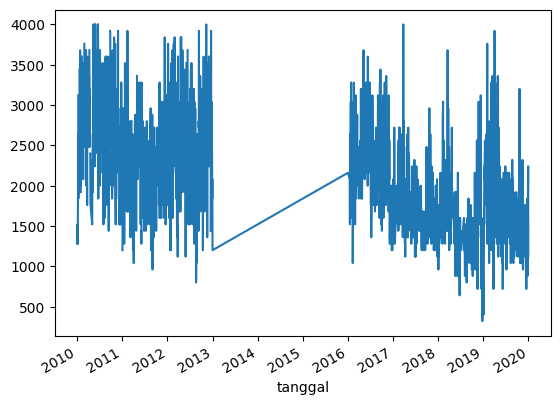

In [185]:
combined_data['co(ug/m3)'].plot()

<Axes: >

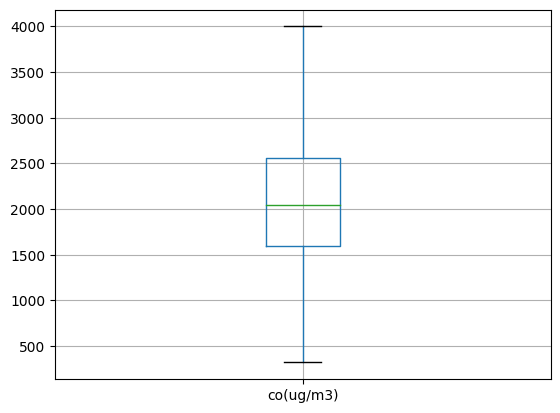

In [186]:
combined_data[['co(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'co(ug/m3)'}>]], dtype=object)

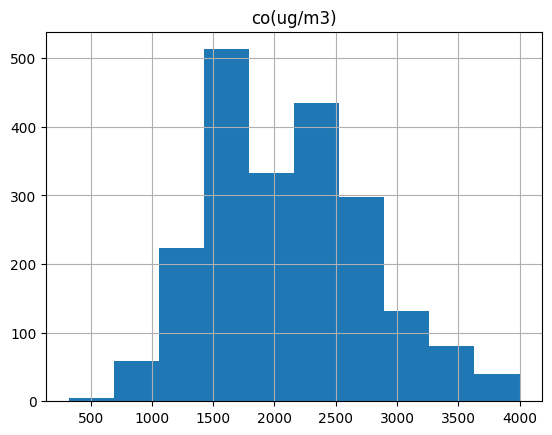

In [187]:
combined_data[['co(ug/m3)']].hist()

In [188]:
outliers = find_outliers_IQR(combined_data['co(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


### O<sub>3</sub> Clean-v1

In [189]:
combined_data['o3(ug/m3)'] = combined_data['o3(ug/m3)'][combined_data['o3(ug/m3)'] < 294]

C:\Users\ernic\AppData\Local\Temp\ipykernel_14248\1815178518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['o3(ug/m3)'] = combined_data['o3(ug/m3)'][combined_data['o3(ug/m3)'] < 294]


<Axes: xlabel='tanggal'>

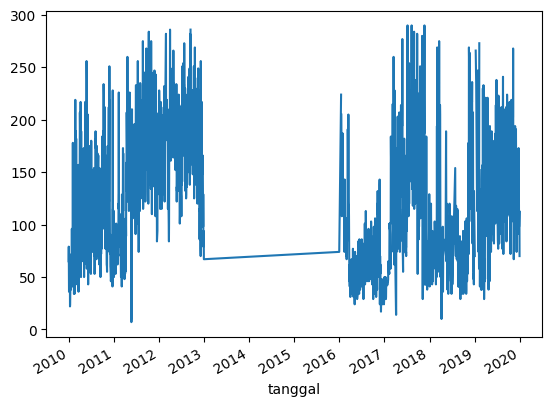

In [190]:
combined_data['o3(ug/m3)'].plot()

<Axes: >

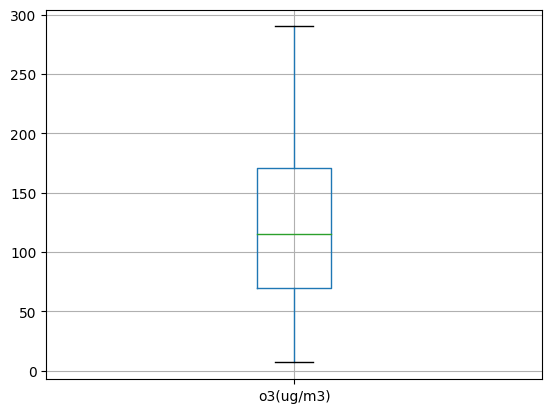

In [191]:
combined_data[['o3(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'o3(ug/m3)'}>]], dtype=object)

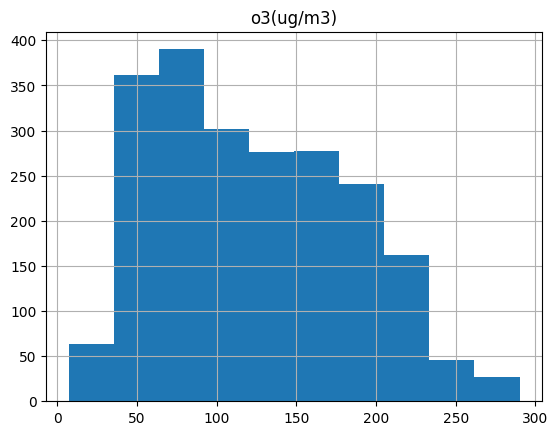

In [192]:
combined_data[['o3(ug/m3)']].hist()

In [193]:
outliers = find_outliers_IQR(combined_data['o3(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


### NO<sub>2</sub> Clean-v1

<Axes: xlabel='tanggal'>

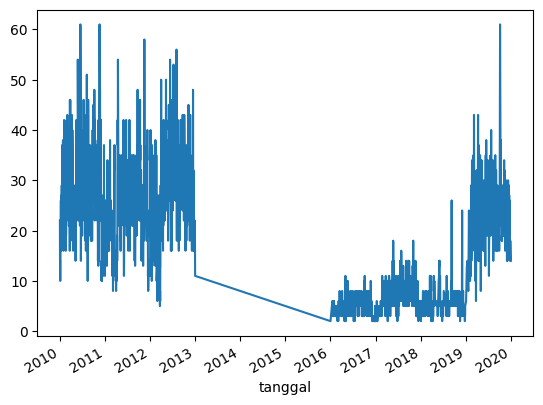

In [194]:
combined_data['no2(ug/m3)'].plot()

<Axes: >

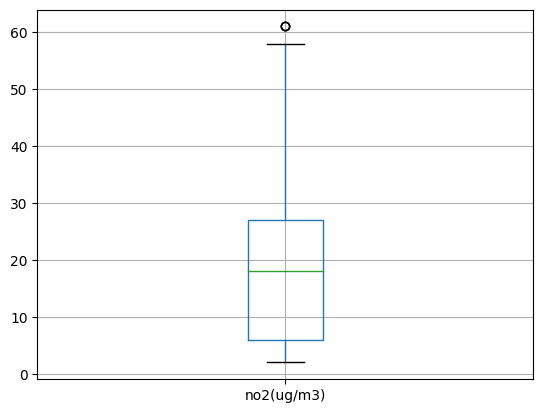

In [195]:
combined_data[['no2(ug/m3)']].boxplot()

array([[<Axes: title={'center': 'no2(ug/m3)'}>]], dtype=object)

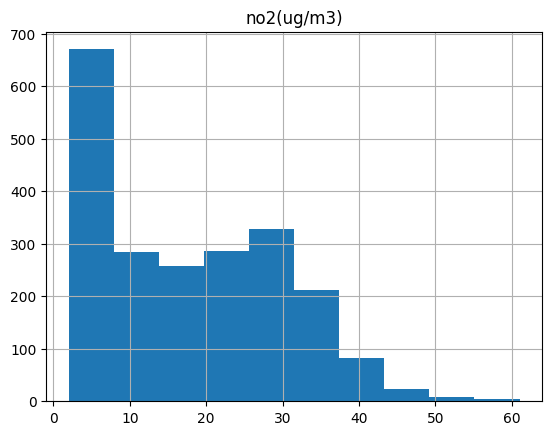

In [196]:
combined_data[['no2(ug/m3)']].hist()

In [197]:
outliers = find_outliers_IQR(combined_data['no2(ug/m3)'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 3
max outlier value: 61.0
min outlier value: 61.0


In [198]:
combined_data = combined_data[~combined_data.isna().any(axis=1)]
combined_data

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-02,32.0,32.0,2.0,3.0,1280.0,17.0,79.0,33.0,14.0,10.0,28.7,73.0,6.6,2.0
2010-01-03,27.0,27.0,2.0,3.0,1520.0,20.0,48.0,21.0,14.0,10.0,28.8,72.0,0.0,3.0
2010-01-04,22.0,23.0,2.0,3.0,1280.0,17.0,36.0,16.0,10.0,7.0,29.9,70.0,0.0,2.0
2010-01-05,25.0,26.0,2.0,3.0,1360.0,18.0,36.0,16.0,13.0,9.0,28.5,70.0,0.4,3.0
2010-01-06,30.0,30.0,3.0,4.0,1760.0,23.0,46.0,20.0,18.0,12.0,28.6,74.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,52.0,51.0,21.0,21.0,880.0,12.0,103.0,43.0,14.0,10.0,26.3,92.0,38.0,0.0
2019-12-26,58.0,54.0,24.0,24.0,1520.0,20.0,125.0,52.0,14.0,10.0,27.9,82.0,27.4,1.0
2019-12-27,54.0,52.0,29.0,28.0,1680.0,22.0,98.0,41.0,18.0,12.0,27.3,85.0,3.0,1.0


In [199]:
combined_data.drop(['pm10_ispu', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu'], axis=1, inplace=True)

In [200]:
pm10_ispu = [aqi_formulation.concentration_to_aqi('pm10', result) for result in combined_data['pm10(ug/m3)']]
combined_data.insert(1, 'pm10_ispu', pm10_ispu)
so2_ispu = [aqi_formulation.concentration_to_aqi('so2', result) for result in combined_data['so2(ug/m3)']]
combined_data.insert(3, 'so2_ispu', so2_ispu)
co_ispu = [aqi_formulation.concentration_to_aqi('co', result) for result in combined_data['co(ug/m3)']]
combined_data.insert(5, 'co_ispu', co_ispu)
o3_ispu = [aqi_formulation.concentration_to_aqi('o3', result) for result in combined_data['o3(ug/m3)']]
combined_data.insert(7, 'o3_ispu', o3_ispu)
no2_ispu = [aqi_formulation.concentration_to_aqi('no2', result) for result in combined_data['no2(ug/m3)']]
combined_data.insert(9, 'no2_ispu', no2_ispu)

In [201]:
combined_data

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-02,32.0,32,2.0,3,1280.0,17,79.0,33,14.0,10,28.7,73.0,6.6,2.0
2010-01-03,27.0,27,2.0,3,1520.0,20,48.0,21,14.0,10,28.8,72.0,0.0,3.0
2010-01-04,22.0,23,2.0,3,1280.0,17,36.0,16,10.0,7,29.9,70.0,0.0,2.0
2010-01-05,25.0,26,2.0,3,1360.0,18,36.0,16,13.0,9,28.5,70.0,0.4,3.0
2010-01-06,30.0,30,3.0,4,1760.0,23,46.0,20,18.0,12,28.6,74.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,52.0,51,21.0,21,880.0,12,103.0,43,14.0,10,26.3,92.0,38.0,0.0
2019-12-26,58.0,54,24.0,24,1520.0,20,125.0,52,14.0,10,27.9,82.0,27.4,1.0
2019-12-27,54.0,52,29.0,28,1680.0,22,98.0,41,18.0,12,27.3,85.0,3.0,1.0


In [202]:
combined_data.corr()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.981350,0.163290,0.161183,0.352794,0.350360,0.335569,0.330432,0.327355,0.327927,0.224964,-0.190241,-0.139038,-0.046864
pm10_ispu,0.981350,1.000000,0.131237,0.129020,0.349348,0.346677,0.331639,0.324872,0.319849,0.320591,0.228571,-0.170833,-0.128924,-0.066178
so2(ug/m3),0.163290,0.131237,1.000000,0.999369,0.197000,0.193222,0.026486,0.032869,-0.052080,-0.053071,0.040721,0.001669,-0.012342,-0.031994
so2_ispu,0.161183,0.129020,0.999369,1.000000,0.196951,0.193241,0.031990,0.038123,-0.045454,-0.046481,0.037871,0.001599,-0.012233,-0.028125
co(ug/m3),0.352794,0.349348,0.197000,0.196951,1.000000,0.999319,0.191660,0.188124,0.522815,0.522647,-0.112026,0.282725,0.127677,0.266506
co_ispu,0.350360,0.346677,0.193222,0.193241,0.999319,1.000000,0.192999,0.189402,0.522591,0.522467,-0.113179,0.283197,0.128216,0.264536
o3(ug/m3),0.335569,0.331639,0.026486,0.031990,0.191660,0.192999,1.000000,0.995858,0.506195,0.505976,0.154418,-0.213391,-0.071812,0.126716
o3_ispu,0.330432,0.324872,0.032869,0.038123,0.188124,0.189402,0.995858,1.000000,0.492927,0.492629,0.150041,-0.209682,-0.070716,0.120914
no2(ug/m3),0.327355,0.319849,-0.052080,-0.045454,0.522815,0.522591,0.506195,0.492927,1.000000,0.999376,0.069003,-0.133414,-0.050606,0.458212
no2_ispu,0.327927,0.320591,-0.053071,-0.046481,0.522647,0.522467,0.505976,0.492629,0.999376,1.000000,0.069738,-0.132678,-0.049173,0.456828


In [203]:
combined_data.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.00000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,56.565405,50.584092,19.725922,19.576905,2092.764734,26.663632,122.57930,52.169142,17.331576,11.710589,28.523958,75.581696,5.613225,1.972688
std,20.905701,14.351815,8.309890,7.809740,654.996559,7.783377,60.68471,26.752974,11.862640,7.257462,0.952164,5.935246,14.178536,0.897275
min,5.000000,6.000000,1.000000,2.000000,320.000000,5.000000,7.00000,4.000000,2.000000,2.000000,24.900000,54.000000,0.000000,0.000000
25%,41.000000,41.000000,14.000000,14.000000,1600.000000,21.000000,70.00000,30.000000,6.000000,5.000000,27.900000,72.000000,0.000000,1.000000
50%,56.000000,53.000000,19.000000,19.000000,2000.000000,26.000000,115.00000,48.000000,16.000000,11.000000,28.600000,76.000000,0.000000,2.000000
75%,72.000000,61.000000,26.000000,26.000000,2560.000000,32.000000,168.00000,71.000000,27.000000,18.000000,29.200000,80.000000,4.000000,3.000000
max,124.000000,87.000000,45.000000,43.000000,4000.000000,50.000000,290.00000,141.000000,61.000000,38.000000,30.800000,94.000000,179.700000,5.000000


## Monthly Data

In [204]:
monthly_combined_data = combined_data.resample('M').mean(numeric_only=True)
monthly_combined_data.drop(['pm10_ispu', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu'], axis=1, inplace=True)
for column in monthly_combined_data:
    monthly_combined_data[column] = round(monthly_combined_data[column], 1)
pm10_ispu = [aqi_formulation.concentration_to_aqi('pm10', result) for result in monthly_combined_data['pm10(ug/m3)']]
monthly_combined_data.insert(1, 'pm10_ispu', pm10_ispu)
so2_ispu = [aqi_formulation.concentration_to_aqi('so2', result) for result in monthly_combined_data['so2(ug/m3)']]
monthly_combined_data.insert(3, 'so2_ispu', so2_ispu)
co_ispu = [aqi_formulation.concentration_to_aqi('co', result) for result in monthly_combined_data['co(ug/m3)']]
monthly_combined_data.insert(5, 'co_ispu', co_ispu)
o3_ispu = [aqi_formulation.concentration_to_aqi('o3', result) for result in monthly_combined_data['o3(ug/m3)']]
monthly_combined_data.insert(7, 'o3_ispu', o3_ispu)
no2_ispu = [aqi_formulation.concentration_to_aqi('no2', result) for result in monthly_combined_data['no2(ug/m3)']]
monthly_combined_data.insert(9, 'no2_ispu', no2_ispu)
monthly_combined_data

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,,,,,,,,,
2010-01-31,41.9,42.0,4.7,5.0,2372.3,30.0,51.0,22.0,21.8,14.0,27.4,80.2,14.4,2.5
2010-02-28,56.2,53.0,6.0,7.0,2825.5,36.0,97.1,41.0,28.7,19.0,28.2,80.3,9.6,2.6
2010-03-31,59.3,55.0,8.0,9.0,2897.4,36.0,101.1,42.0,29.2,19.0,28.6,78.5,9.4,2.6
2010-04-30,59.5,55.0,12.4,13.0,2720.0,34.0,118.3,49.0,27.1,18.0,29.6,74.5,2.2,2.7
2010-05-31,65.2,58.0,16.3,16.0,2907.7,37.0,124.3,52.0,31.1,20.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,68.8,59.0,19.7,20.0,1680.0,22.0,143.1,60.0,25.3,16.0,28.3,68.8,0.0,1.4
2019-09-30,64.3,57.0,21.6,21.0,1523.2,20.0,140.4,59.0,22.5,15.0,28.8,68.9,0.0,1.2
2019-10-31,73.4,62.0,21.6,21.0,1540.0,20.0,159.5,67.0,23.6,15.0,29.5,70.0,0.0,1.2


In [205]:
monthly_combined_data.corr()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.977956,0.126181,0.117783,0.246479,0.242048,0.425902,0.427136,0.374811,0.369066,0.426796,-0.486376,-0.433054,0.017661
pm10_ispu,0.977956,1.000000,0.064030,0.055381,0.250049,0.244704,0.443502,0.443124,0.351743,0.346794,0.448139,-0.429769,-0.395651,-0.025482
so2(ug/m3),0.126181,0.064030,1.000000,0.999144,0.236463,0.247025,0.017866,0.024523,-0.127151,-0.121001,0.003908,0.103687,0.072610,-0.050275
so2_ispu,0.117783,0.055381,0.999144,1.000000,0.235116,0.245843,0.011477,0.017973,-0.126433,-0.120092,-0.000437,0.104846,0.078681,-0.045518
co(ug/m3),0.246479,0.250049,0.236463,0.235116,1.000000,0.998517,0.174222,0.173210,0.577866,0.580662,-0.062654,0.345043,0.220203,0.600904
co_ispu,0.242048,0.244704,0.247025,0.245843,0.998517,1.000000,0.169683,0.168798,0.575047,0.577826,-0.060090,0.346191,0.220079,0.598904
o3(ug/m3),0.425902,0.443502,0.017866,0.011477,0.174222,0.169683,1.000000,0.999750,0.564397,0.559943,0.290305,-0.376251,-0.248136,0.324338
o3_ispu,0.427136,0.443124,0.024523,0.017973,0.173210,0.168798,0.999750,1.000000,0.562460,0.557992,0.289979,-0.381003,-0.250860,0.325390
no2(ug/m3),0.374811,0.351743,-0.127151,-0.126433,0.577866,0.575047,0.564397,0.562460,1.000000,0.998995,0.187547,-0.271646,-0.213464,0.716269
no2_ispu,0.369066,0.346794,-0.121001,-0.120092,0.580662,0.577826,0.559943,0.557992,0.998995,1.000000,0.193185,-0.267442,-0.212824,0.717903


### PM10

In [206]:
pm10_monthly = monthly_combined_data.loc[:, ['pm10(ug/m3)', 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata(%)', 'curah_hujan(mm)', 'kecepatan_angin_rata-rata(m/s)']]
pm10_ispu = [aqi_formulation.concentration_to_aqi('pm10', result) for result in monthly_combined_data['pm10(ug/m3)']]
pm10_monthly.insert(1, 'pm10_ispu', pm10_ispu)
pm10_monthly

,pm10(ug/m3),pm10_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,
2010-01-31,41.9,42.0,27.4,80.2,14.4,2.5
2010-02-28,56.2,53.0,28.2,80.3,9.6,2.6
2010-03-31,59.3,55.0,28.6,78.5,9.4,2.6
2010-04-30,59.5,55.0,29.6,74.5,2.2,2.7
2010-05-31,65.2,58.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...
2019-08-31,68.8,59.0,28.3,68.8,0.0,1.4
2019-09-30,64.3,57.0,28.8,68.9,0.0,1.2
2019-10-31,73.4,62.0,29.5,70.0,0.0,1.2


In [207]:
pm10_monthly.corr()

,pm10(ug/m3),pm10_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.977956,0.426796,-0.486376,-0.433054,0.017661
pm10_ispu,0.977956,1.000000,0.448139,-0.429769,-0.395651,-0.025482
temperatur_rata-rata(°C),0.426796,0.448139,1.000000,-0.555654,-0.611214,-0.151578
kelembapan_rata-rata(%),-0.486376,-0.429769,-0.555654,1.000000,0.799178,-0.027496
curah_hujan(mm),-0.433054,-0.395651,-0.611214,0.799178,1.000000,-0.058607
kecepatan_angin_rata-rata(m/s),0.017661,-0.025482,-0.151578,-0.027496,-0.058607,1.000000


<Axes: xlabel='tanggal'>

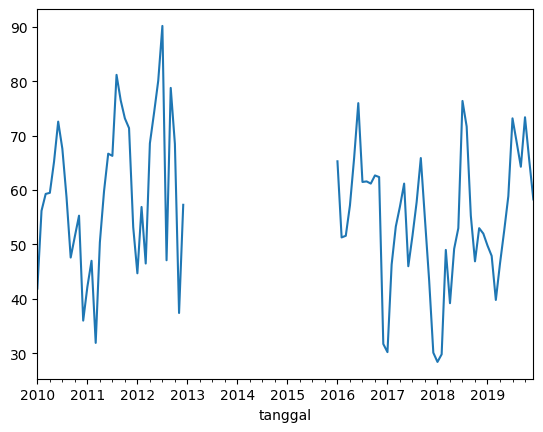

In [208]:
pm10_monthly['pm10(ug/m3)'].plot()

<Axes: >

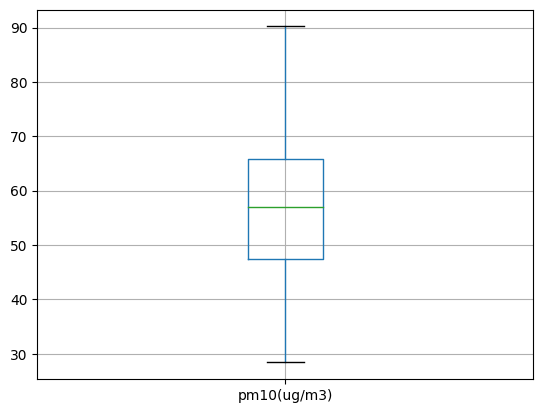

In [209]:
pm10_monthly[['pm10(ug/m3)']].boxplot()

### SO2

In [210]:
so2_monthly = monthly_combined_data.loc[:, ['so2(ug/m3)', 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata(%)', 'curah_hujan(mm)', 'kecepatan_angin_rata-rata(m/s)']]
so2_ispu = [aqi_formulation.concentration_to_aqi('so2', result) for result in monthly_combined_data['so2(ug/m3)']]
so2_monthly.insert(1, 'so2_ispu', so2_ispu)
so2_monthly

,so2(ug/m3),so2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,
2010-01-31,4.7,5.0,27.4,80.2,14.4,2.5
2010-02-28,6.0,7.0,28.2,80.3,9.6,2.6
2010-03-31,8.0,9.0,28.6,78.5,9.4,2.6
2010-04-30,12.4,13.0,29.6,74.5,2.2,2.7
2010-05-31,16.3,16.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...
2019-08-31,19.7,20.0,28.3,68.8,0.0,1.4
2019-09-30,21.6,21.0,28.8,68.9,0.0,1.2
2019-10-31,21.6,21.0,29.5,70.0,0.0,1.2


In [211]:
so2_monthly.corr()

,so2(ug/m3),so2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
so2(ug/m3),1.000000,0.999144,0.003908,0.103687,0.072610,-0.050275
so2_ispu,0.999144,1.000000,-0.000437,0.104846,0.078681,-0.045518
temperatur_rata-rata(°C),0.003908,-0.000437,1.000000,-0.555654,-0.611214,-0.151578
kelembapan_rata-rata(%),0.103687,0.104846,-0.555654,1.000000,0.799178,-0.027496
curah_hujan(mm),0.072610,0.078681,-0.611214,0.799178,1.000000,-0.058607
kecepatan_angin_rata-rata(m/s),-0.050275,-0.045518,-0.151578,-0.027496,-0.058607,1.000000


<Axes: xlabel='tanggal'>

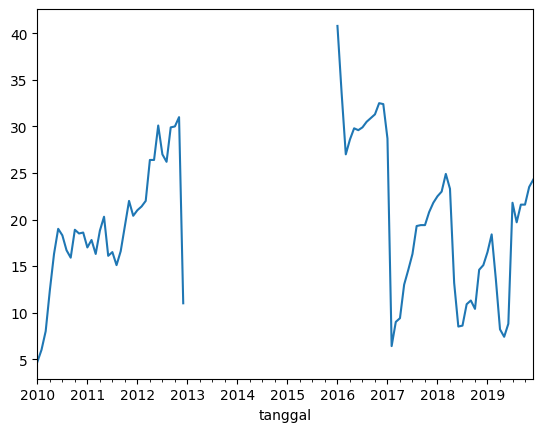

In [212]:
so2_monthly['so2(ug/m3)'].plot()

<Axes: >

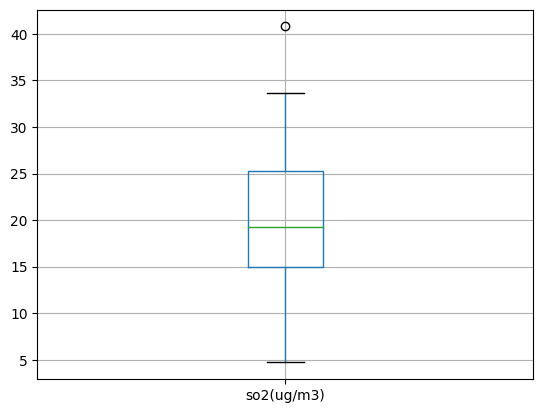

In [213]:
so2_monthly[['so2(ug/m3)']].boxplot()

### CO

In [214]:
co_monthly = monthly_combined_data.loc[:, ['co(ug/m3)', 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata(%)', 'curah_hujan(mm)', 'kecepatan_angin_rata-rata(m/s)']]
co_ispu = [aqi_formulation.concentration_to_aqi('co', result) for result in monthly_combined_data['co(ug/m3)']]
co_monthly.insert(1, 'co_ispu', co_ispu)
co_monthly

,co(ug/m3),co_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,
2010-01-31,2372.3,30.0,27.4,80.2,14.4,2.5
2010-02-28,2825.5,36.0,28.2,80.3,9.6,2.6
2010-03-31,2897.4,36.0,28.6,78.5,9.4,2.6
2010-04-30,2720.0,34.0,29.6,74.5,2.2,2.7
2010-05-31,2907.7,37.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...
2019-08-31,1680.0,22.0,28.3,68.8,0.0,1.4
2019-09-30,1523.2,20.0,28.8,68.9,0.0,1.2
2019-10-31,1540.0,20.0,29.5,70.0,0.0,1.2


In [215]:
co_monthly.corr()

,co(ug/m3),co_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
co(ug/m3),1.000000,0.998517,-0.062654,0.345043,0.220203,0.600904
co_ispu,0.998517,1.000000,-0.060090,0.346191,0.220079,0.598904
temperatur_rata-rata(°C),-0.062654,-0.060090,1.000000,-0.555654,-0.611214,-0.151578
kelembapan_rata-rata(%),0.345043,0.346191,-0.555654,1.000000,0.799178,-0.027496
curah_hujan(mm),0.220203,0.220079,-0.611214,0.799178,1.000000,-0.058607
kecepatan_angin_rata-rata(m/s),0.600904,0.598904,-0.151578,-0.027496,-0.058607,1.000000


<Axes: xlabel='tanggal'>

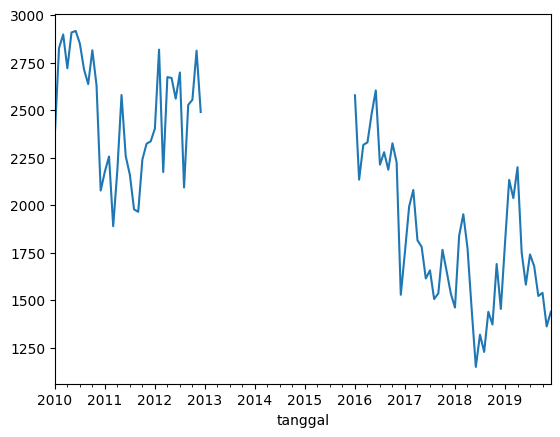

In [216]:
co_monthly['co(ug/m3)'].plot()

<Axes: >

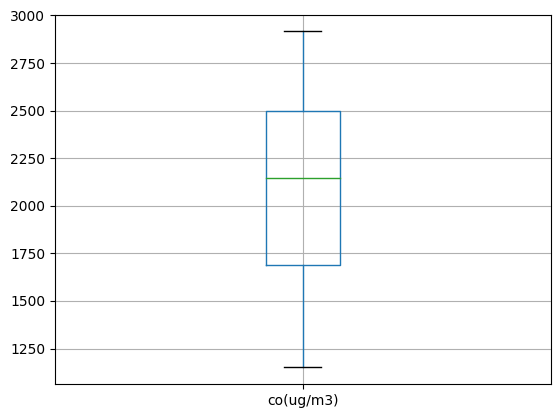

In [217]:
co_monthly[['co(ug/m3)']].boxplot()

### O3

In [218]:
o3_monthly = monthly_combined_data.loc[:, ['o3(ug/m3)', 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata(%)', 'curah_hujan(mm)', 'kecepatan_angin_rata-rata(m/s)']]
o3_ispu = [aqi_formulation.concentration_to_aqi('o3', result) for result in monthly_combined_data['o3(ug/m3)']]
o3_monthly.insert(1, 'o3_ispu', o3_ispu)
o3_monthly

,o3(ug/m3),o3_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,
2010-01-31,51.0,22.0,27.4,80.2,14.4,2.5
2010-02-28,97.1,41.0,28.2,80.3,9.6,2.6
2010-03-31,101.1,42.0,28.6,78.5,9.4,2.6
2010-04-30,118.3,49.0,29.6,74.5,2.2,2.7
2010-05-31,124.3,52.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...
2019-08-31,143.1,60.0,28.3,68.8,0.0,1.4
2019-09-30,140.4,59.0,28.8,68.9,0.0,1.2
2019-10-31,159.5,67.0,29.5,70.0,0.0,1.2


In [219]:
o3_monthly.corr()

,o3(ug/m3),o3_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
o3(ug/m3),1.000000,0.999750,0.290305,-0.376251,-0.248136,0.324338
o3_ispu,0.999750,1.000000,0.289979,-0.381003,-0.250860,0.325390
temperatur_rata-rata(°C),0.290305,0.289979,1.000000,-0.555654,-0.611214,-0.151578
kelembapan_rata-rata(%),-0.376251,-0.381003,-0.555654,1.000000,0.799178,-0.027496
curah_hujan(mm),-0.248136,-0.250860,-0.611214,0.799178,1.000000,-0.058607
kecepatan_angin_rata-rata(m/s),0.324338,0.325390,-0.151578,-0.027496,-0.058607,1.000000


<Axes: xlabel='tanggal'>

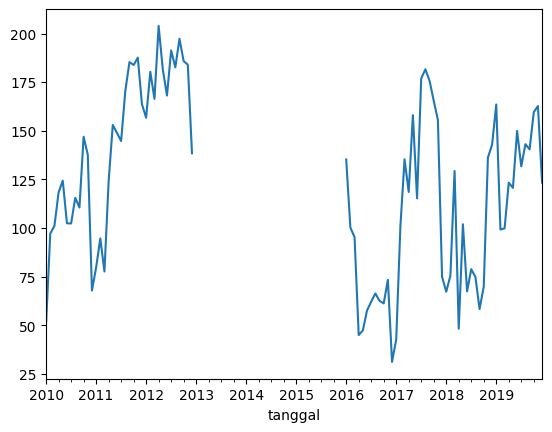

In [220]:
o3_monthly['o3(ug/m3)'].plot()

<Axes: >

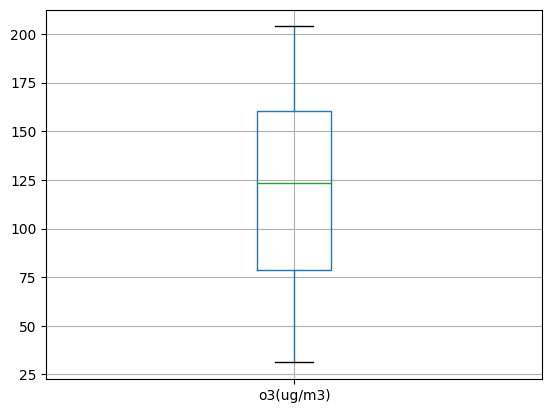

In [221]:
o3_monthly[['o3(ug/m3)']].boxplot()

### NO2

In [222]:
no2_monthly = monthly_combined_data.loc[:, ['no2(ug/m3)', 'temperatur_rata-rata(°C)', 'kelembapan_rata-rata(%)', 'curah_hujan(mm)', 'kecepatan_angin_rata-rata(m/s)']]
no2_ispu = [aqi_formulation.concentration_to_aqi('no2', result) for result in monthly_combined_data['no2(ug/m3)']]
no2_monthly.insert(1, 'no2_ispu', no2_ispu)
no2_monthly

,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
tanggal,,,,,,
2010-01-31,21.8,14.0,27.4,80.2,14.4,2.5
2010-02-28,28.7,19.0,28.2,80.3,9.6,2.6
2010-03-31,29.2,19.0,28.6,78.5,9.4,2.6
2010-04-30,27.1,18.0,29.6,74.5,2.2,2.7
2010-05-31,31.1,20.0,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...
2019-08-31,25.3,16.0,28.3,68.8,0.0,1.4
2019-09-30,22.5,15.0,28.8,68.9,0.0,1.2
2019-10-31,23.6,15.0,29.5,70.0,0.0,1.2


In [223]:
no2_monthly.corr()

,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
no2(ug/m3),1.000000,0.998995,0.187547,-0.271646,-0.213464,0.716269
no2_ispu,0.998995,1.000000,0.193185,-0.267442,-0.212824,0.717903
temperatur_rata-rata(°C),0.187547,0.193185,1.000000,-0.555654,-0.611214,-0.151578
kelembapan_rata-rata(%),-0.271646,-0.267442,-0.555654,1.000000,0.799178,-0.027496
curah_hujan(mm),-0.213464,-0.212824,-0.611214,0.799178,1.000000,-0.058607
kecepatan_angin_rata-rata(m/s),0.716269,0.717903,-0.151578,-0.027496,-0.058607,1.000000


<Axes: xlabel='tanggal'>

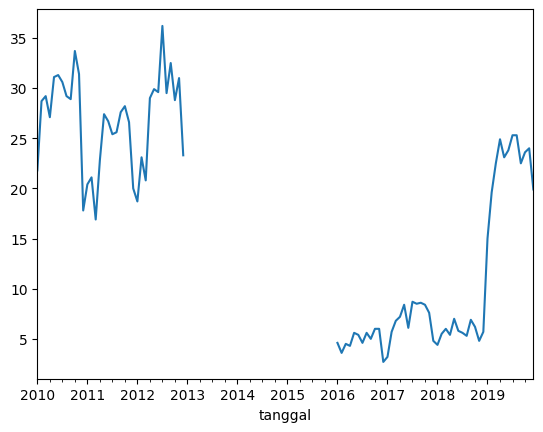

In [224]:
no2_monthly['no2(ug/m3)'].plot()

<Axes: >

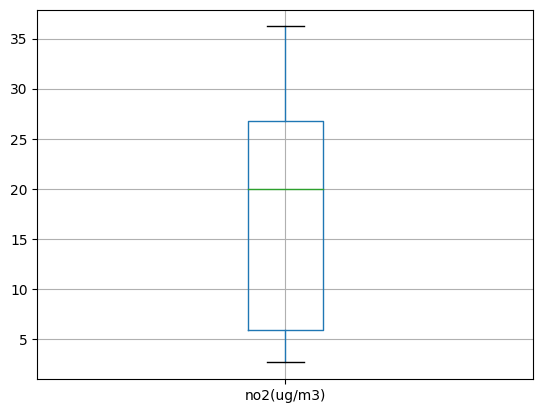

In [225]:
no2_monthly[['no2(ug/m3)']].boxplot()

# Save to CSV

## Monthly Data

In [226]:
pm10_monthly.to_csv("..\\Model\\Data for Model\\pm10_meteorolgical_monthly.csv")
so2_monthly.to_csv("..\\Model\\Data for Model\\so2_meteorolgical_monthly.csv")
co_monthly.to_csv("..\\Model\\Data for Model\\co_meteorolgical_monthly.csv")
o3_monthly.to_csv("..\\Model\\Data for Model\\o3_meteorolgical_monthly.csv")
no2_monthly.to_csv("..\\Model\\Data for Model\\no2_meteorolgical_monthly.csv")